# LROSE OVERVIEW

## By Michael Bell
## Colorado State University

<img src="images/LROSE_logo.png" width="200" align="left">


# Demo application of prototype LROSE tools

1. Download some NEXRAD Level 2 data from http://motherlode.ucar.edu/native/radar/level2 (not shown)
2. Convert the Level 2 format to CfRadial format using RadxConvert
3. Calculate the rain rates using RadxPartRain
4. Grid the data using Radx2Grid
5. Do some calculations
6. Plot the rain rates

In [1]:
# Convert the Level 2 format to CfRadial format using RadxConvert
run(`RadxConvert -f data/Level2_KHGX_20170827_1402.ar2v`);

Program 'RadxConvert'
Run-time 2017/08/27 20:44:08.

Copyright (c) 1992 - 2017
University Corporation for Atmospheric Research (UCAR)
National Center for Atmospheric Research (NCAR)
Boulder, Colorado, USA.

Redistribution and use in source and binary forms, with
or without modification, are permitted provided that the following
conditions are met:

1) Redistributions of source code must retain the above copyright
notice, this list of conditions and the following disclaimer.

2) Redistributions in binary form must reproduce the above copyright
notice, this list of conditions and the following disclaimer in the
documentation and/or other materials provided with the distribution.

3) Neither the name of UCAR, NCAR nor the names of its contributors, if
any, may be used to endorse or promote products derived from this
software without specific prior written permission.

4) If the software is modified to produce derivative works, such modified
software should be clearly marked, so as not to 

In [2]:
# Calculate the rain rates using RadxPartRain
run(`RadxPartRain -f ./output/20170827/cfrad.20170827_140311.645_to_20170827_140722.830_KHGX_Surveillance_SUR.nc -params ./data/RadxPartRain.params`)

WARNING - RadxPartRain::_locateMeltingLayer
  No melting layer found
  i.e. no wet snow in PID
WARNING NcfRadxFile::_setCompression
  Cannot compress field: SNR
  Will be written uncompressed instead
WARNING NcfRadxFile::_setCompression
  Cannot compress field: DBZ
  Will be written uncompressed instead
WARNING NcfRadxFile::_setCompression
  Cannot compress field: ZDR
  Will be written uncompressed instead
WARNING NcfRadxFile::_setCompression
  Cannot compress field: LDR
  Will be written uncompressed instead
WARNING NcfRadxFile::_setCompression
  Cannot compress field: RHOHV
  Will be written uncompressed instead
WARNING NcfRadxFile::_setCompression
  Cannot compress field: PHIDP
  Will be written uncompressed instead
WARNING NcfRadxFile::_setCompression
  Cannot compress field: KDP
  Will be written uncompressed instead
WARNING NcfRadxFile::_setCompression
  Cannot compress field: PSOB
  Will be written uncompressed instead
WARNING NcfRadxFile::_setCompression
  Cannot compress field

In [3]:
# Grid the data using Radx2Grid
run(`Radx2Grid -f output/20170827/cfrad.20170827_140311.645_to_20170827_140722.830_KHGX_Surveillance_SUR.nc -params ./data/Radx2Grid.params -outdir ./output`)

Program 'Radx2Grid'
Run-time 2017/08/27 20:44:56.

Copyright (c) 1992 - 2017
University Corporation for Atmospheric Research (UCAR)
National Center for Atmospheric Research (NCAR)
Boulder, Colorado, USA.

Redistribution and use in source and binary forms, with
or without modification, are permitted provided that the following
conditions are met:

1) Redistributions of source code must retain the above copyright
notice, this list of conditions and the following disclaimer.

2) Redistributions in binary form must reproduce the above copyright
notice, this list of conditions and the following disclaimer in the
documentation and/or other materials provided with the distribution.

3) Neither the name of UCAR, NCAR nor the names of its contributors, if
any, may be used to endorse or promote products derived from this
software without specific prior written permission.

4) If the software is modified to produce derivative works, such modified
software should be clearly marked, so as not to co

In [4]:
# Import some modules
# JuliaMet available from https://github.com/metjmart/JuliaMet
# PyPlot available via `Pkg.add("PyPlot")`

using JuliaMet
using PyPlot
plt = PyPlot

PyPlot

In [5]:
# Read in the gridded radar data
volume = "./output/20170827/ncf_20170827_140722.nc"
vars = ["x0","y0","z0","DBZ","ZDR","RATE_KDP_ZDR","RATE_ZH","RATE_Z_ZDR"]
x,y,z,dbz,zdr,kdp_zdr_rr,zh_rr,z_zdr_rr = read_ncvars(volume,vars);

Reading in x0 ...
Reading in y0 ...
Reading in z0 ...
Reading in DBZ ...
Reading in ZDR ...
Reading in RATE_KDP_ZDR ...
Reading in RATE_ZH ...
Reading in RATE_Z_ZDR ...
Successfully read in x0!
Successfully read in y0!
Successfully read in z0!
Successfully read in DBZ!
Successfully read in ZDR!
Successfully read in RATE_KDP_ZDR!
Successfully read in RATE_ZH!
Successfully read in RATE_Z_ZDR!


In [6]:
# Calculate the difference between the Z/ZDR and Z only rainrates
rr_diff = z_zdr_rr - zh_rr;

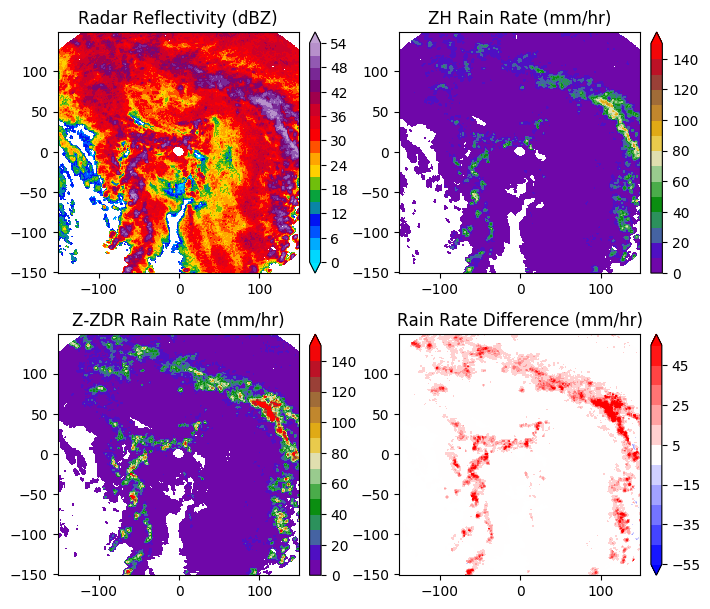

In [11]:
# Plot up the results at 3 km
fig = plt.figure(figsize=(7, 12))
zplot = 3
hmin = 100
hmax = 400

plt.subplot(421, aspect="equal")
plt.contourf(x[hmin:hmax],y[hmin:hmax],dbz[hmin:hmax,hmin:hmax,zplot]',levels=collect(0:3:54),cmap="radar",extend="both")
plt.colorbar(fraction=0.046, pad=0.04)
#plt.contour(r[1:121],z,azmean_drypv[1:121,:]'.*10.0^6,levels=collect(0:20:300),colors="k")
plt.title("Radar Reflectivity (dBZ)")

plt.subplot(422, aspect="equal")
plt.contourf(x[hmin:hmax],y[hmin:hmax],zh_rr[hmin:hmax,hmin:hmax,zplot]',levels=collect(0:10:150),cmap="radar_carbone",extend="max")
plt.colorbar(fraction=0.046, pad=0.04)
plt.title("ZH Rain Rate (mm/hr)")

plt.subplot(423, aspect="equal")
plt.contourf(x[hmin:hmax],y[hmin:hmax],z_zdr_rr[hmin:hmax,hmin:hmax,zplot]',levels=collect(0:10:150),cmap="radar_carbone",extend="max")
plt.colorbar(fraction=0.046, pad=0.04)
plt.title("Z-ZDR Rain Rate (mm/hr)")

plt.subplot(424, aspect="equal")
plt.contourf(x[hmin:hmax],y[hmin:hmax],rr_diff[hmin:hmax,hmin:hmax,zplot]',levels=collect(-55:10:55),cmap="bwr",extend="both")
plt.colorbar(fraction=0.046, pad=0.04)
plt.title("Rain Rate Difference (mm/hr)")

plt.tight_layout()